# jupyter-workdocs cell tag filtering

***create files from master using command-line nbconvert calls in code cells at bottom of master notebook***


This is the simplest use of ipynb-workdocs. Nbconvert command line calls are included as code cells in the master notebook, and filtered out of the other notebooks. 

The next section is a skeleton example of a master document, with examples of what kinds of cell tags are used. The nbconvert calls follow that. 


---

# <center> Project X RollDoc</center>

(need to omit the above title cell from the pdf file because the latex pdf title is added in later via nbconvert template)

<center>
*Good things come in threes. This rolling documentation is available as HTML, PDF, or Slideshow*

</center>

<center> ***(MASTER notebook)*** </center>



<center>

[Background](#Background)  
[Methods](#Methods)  
[Results](#Results)  
[Conclusions](#Conclusions)  
[References](#References)  

</center>

<center>

[Nbconvert](#Nbconvert)

</center>

## Background

*JG NOTE HERE THAT I DON'T WANT OTHERS TO SEE. *

blah blah blah blah

## Methods

blah blah blah

- Here are some slideshow bulletpoints
- Sometimes I need to say things in this format in slides only
- etc etc etc

## Results

blah blah blah

Let's add a funky image

In [168]:
from IPython.display import Image

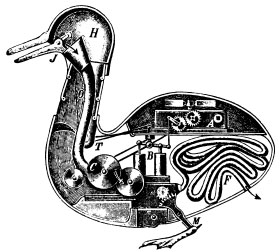

In [169]:
Image('/media/sf_SharedFolder/Code/git_repos_of_mine/neurodidact/Duck_of_Vaucanson.jpg')

...and another...

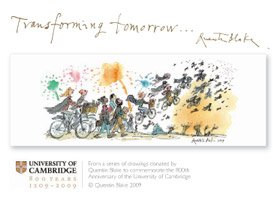

In [170]:
Image('/media/sf_SharedFolder/Code/git_repos_of_mine/neurodidact/TransformingTomorrow_QuentinBlake.jpg')

## Conclusions

*Occasionally I might want to have some formatting or additional stuff for the latex --> pdf file that doesn't appear in the other ones. Blah blah blah blah. *

blah blah blah

## References

blah blah blah

---

## Run filters

Make filtered notebooks

In [2]:
from tag_filter import read_notebook,write_notebook,filter_notebook_data

In [5]:
nb_pfx = 'cell_tag_filtering'
master_nb = '%s__master_nb.ipynb' %nb_pfx
mother_nb = '%s__mother_nb.ipynb' %nb_pfx
pdf_nb = '%s__pdf_nb.ipynb' %nb_pfx
slides_nb = '%s_slides_nb.ipynb' %nb_pfx
html_nb = '%s__html_nb.ipynb' %nb_pfx


# Make mother notebook
master_nb_dat = read_notebook(master_nb)
mother_nb_dat = filter_notebook_data(master_nb_dat,['rough_notes'], exclude=True)
write_notebook(mother_nb,mother_nb_dat)

# Make PDF notebook
pdf_nb_dat = filter_notebook_data(mother_nb_dat,
                                  list_of_tags=['rough_notes','omit_pdf', 'slides_only', 'html_only'],
                                  exclude=True)
write_notebook(pdf_nb,pdf_nb_dat)

# Make HTML notebook
html_nb_dat = filter_notebook_data(mother_nb_dat,
                                  list_of_tags=['rough_notes','omit_html', 'slides_only', 'pdf_only'],
                                  exclude=True)
write_notebook(html_nb,html_nb_dat)

# Make slides notebook
slides_nb_dat = filter_notebook_data(mother_nb_dat,
                                  list_of_tags=['rough_notes','omit_slides', 'html_only', 'pdf_only'],
                                  exclude=True)
write_notebook(slides_nb,slides_nb_dat)

Make PDF file

In [6]:
nbc_cmd = 'jupyter nbconvert --to pdf %s' % pdf_nb
! $nbc_cmd

[NbConvertApp] Converting notebook cell_tag_filtering__pdf_nb.ipynb to pdf
[NbConvertApp] Support files will be in cell_tag_filtering__pdf_nb_files/
[NbConvertApp] Making directory cell_tag_filtering__pdf_nb_files
[NbConvertApp] Making directory cell_tag_filtering__pdf_nb_files
[NbConvertApp] Writing 17157 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'notebook.tex']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 63418 bytes to cell_tag_filtering__pdf_nb.pdf


View PDF file

In [24]:
from IPython.display import display
from wand import image as wimage
import os

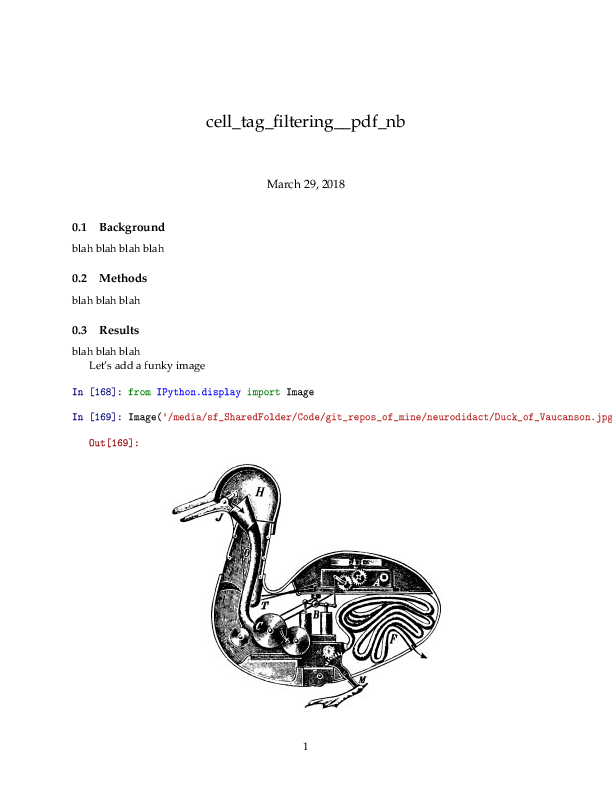

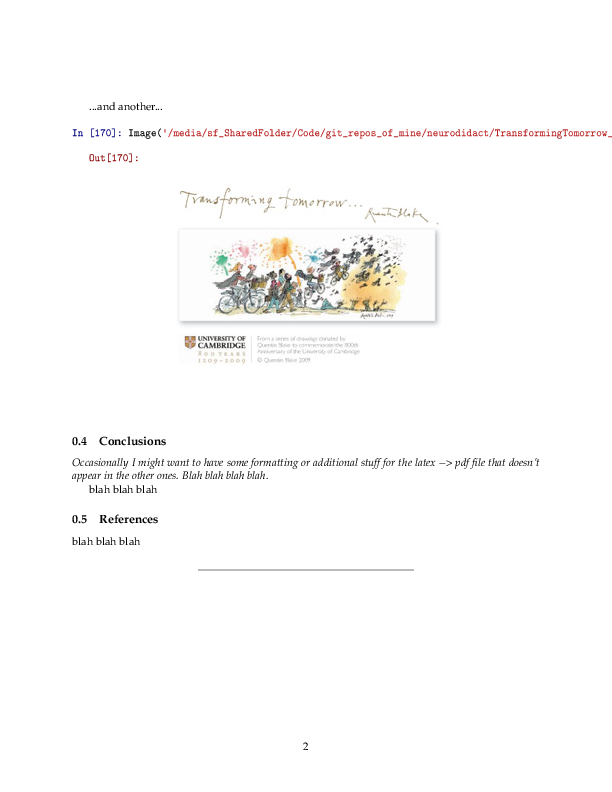

Exception TypeError: TypeError("object of type 'NoneType' has no len()",) in <bound method Image.__del__ of <wand.image.Image: (empty)>> ignored


DelegateError: Postscript delegate failed `/alexandra/mcintosh_lab/john/Code/libraries_of_mine/github/UofT_Coders_Talk_March2018/misc/cell_tag_filtering__pdf_nb.pdf': No such file or directory @ error/pdf.c/ReadPDFImage/677

In [27]:
pdf_file = '%s__pdf_nb.pdf' %nb_pfx
[display(wimage.Image(filename='%s/%s[%s]' %(os.getcwd(),pdf_file,pg))) for pg in [0,1,2,3]];

Make slides file

In [28]:
nbc2slides_template = 'nbc_tpl__slides_reveal_output_toggle.tpl'
nbc_cmd = 'jupyter nbconvert --to slides --template %s %s' %(nbc2slides_template, slides_nb)
! $nbc_cmd

[NbConvertApp] Converting notebook cell_tag_filtering_slides_nb.ipynb to slides
[NbConvertApp] Writing 309919 bytes to cell_tag_filtering_slides_nb.slides.html


View slides file

In [30]:
slides_file = '%s_slides_nb.slides.html' %nb_pfx

In [ ]:
from IPython.nbconvert.postprocessors import ServePostProcessor
server = ServePostProcessor(port=8039)
server(slides_file)

---